In [1]:
import numpy as np
import pandas as pd 
import sklearn

In [2]:
from sklearn.manifold import TSNE

In [ ]:
!pip install --upgrade seaborn

### 1) X = ufac_matrix and Y = ifac_matrix 

In [3]:
X = np.load('ufac.npy')

In [10]:
Y = np.load('ifac.npy')

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("hls", 10)

In [134]:
tsne_30 = TSNE(perplexity=30)
X_embedded = tsne_30.fit_transform(X)
Y_embedded = tsne_30.fit_transform(Y)

In [13]:
Y_embedded

array([[ 3.4006836, 19.8592   ],
       [ 3.4537442, 19.633718 ],
       [-5.9694495, 22.693146 ],
       ...,
       [34.48412  ,  2.9569533],
       [-1.426297 , -5.8483605],
       [33.460144 ,  4.5376654]], dtype=float32)

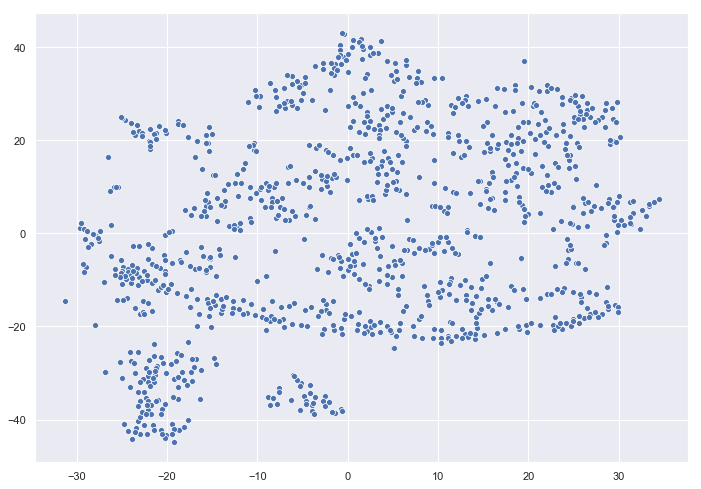

In [69]:
plot_users = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette) #p = 30

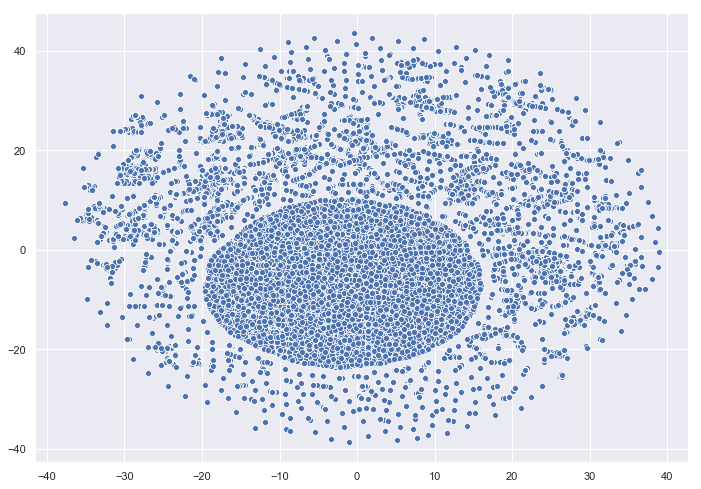

In [72]:
plot_items = sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], legend='full', palette=palette) #perplexity = 30

In [136]:
tsne_2 = TSNE(perplexity=2)
X_embedded = tsne_2.fit_transform(X)
Y_embedded = tsne_2.fit_transform(Y)

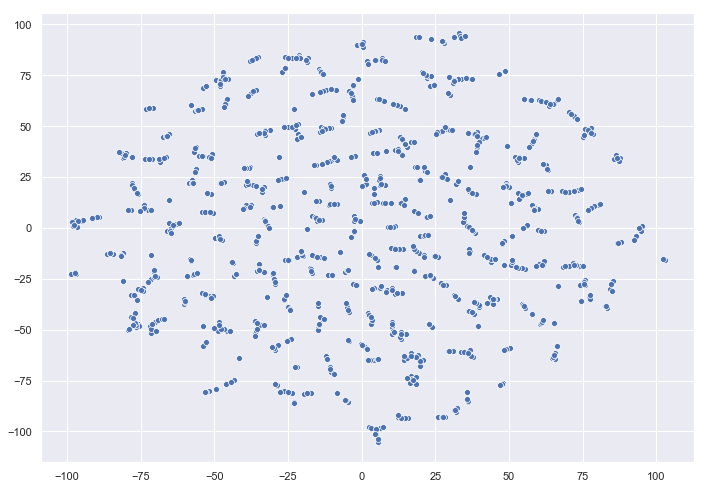

In [145]:
plot_users = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=sns.xkcd_rgb["pale red"]) #p = 2

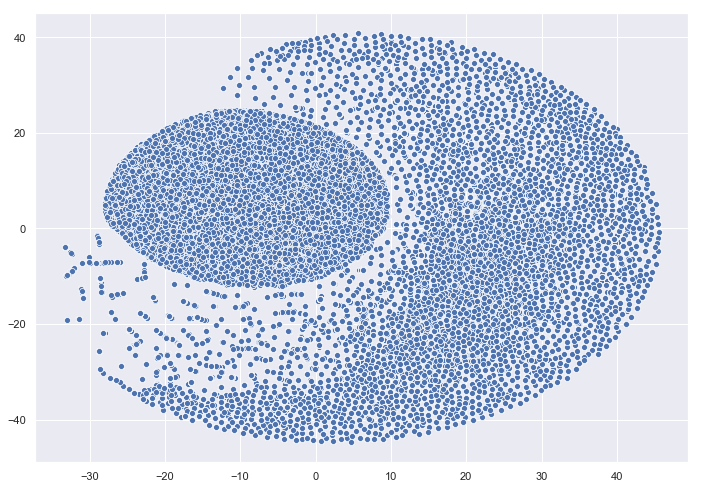

In [137]:
plot_items = sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], legend='full', palette=palette) #p = 2

In [ ]:
tsne_50 = TSNE(perplexity=50)
X_embedded = tsne_50.fit_transform(X)

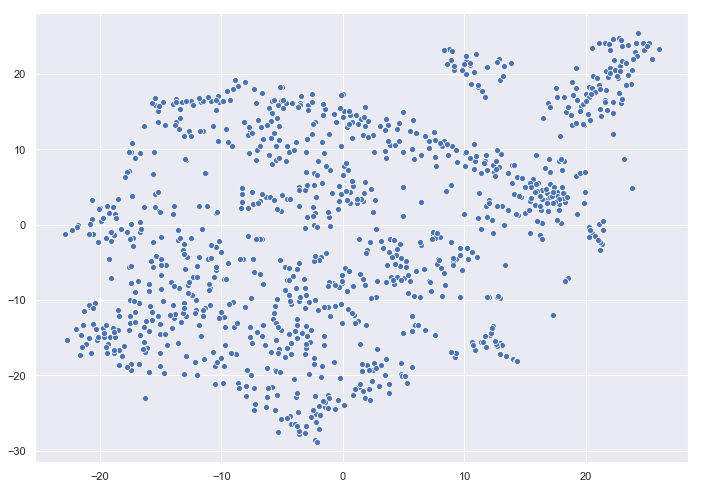

In [133]:
plot_users = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette) #p = 50

In [ ]:
plot_items = sns.scatterplot(Y_embedded[:,0], Y_embedded[:,1], legend='full', palette=palette) #p = 50

In [73]:
fig2 = plot_items.get_figure()
fig2.savefig("plot_items.png")

In [25]:
df = pd.DataFrame(X)

In [27]:
df2 = pd.DataFrame(Y)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.659698,0.197114,0.233048,0.040588,0.244527,0.212148,0.126022,0.539534,0.444838,0.229835,0.069414,0.124285,0.062590,0.049756,0.180366,0.00952,0.176889,0.958436
1,0.000000,0.308706,0.037928,0.139545,0.250708,0.171515,0.057065,0.124591,0.331292,0.425919,0.321790,0.059325,0.014249,0.000000,0.122499,0.00000,0.000000,0.971998
2,0.013229,0.160683,0.064559,0.000000,0.336664,0.127026,0.038694,0.545590,0.258651,0.122975,0.091606,0.315857,0.000000,0.304335,0.317408,0.02372,0.266018,0.326533
3,0.000000,0.119830,0.014555,0.210940,0.332036,0.000000,0.020847,0.144733,0.364109,0.041313,0.417319,0.352289,0.212167,0.126644,0.301515,0.00000,0.000000,0.491851
4,0.439044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.226690,0.000000,0.000000,0.000000,0.000000,0.195470,0.000000,0.352407,0.00000,0.215490,0.330378


In [61]:
result_df = pd.concat([df, df2], axis=0, sort=False)

In [63]:
result_df = result_df.fillna(0)

In [64]:
data_subset = result_df.values

In [65]:
data_subset

array([[0.29920077, 0.2090044 , 0.11480126, ..., 0.00495408, 0.00188697,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02242887, 0.01267322,
        0.        ],
       [0.        , 0.02509158, 0.        , ..., 0.00070562, 0.00338818,
        0.15076083],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tsne_results = tsne_30.fit_transform(data_subset)

In [98]:
tsne_results

array([[  3.4371362,  12.113134 ],
       [  3.7311962,  12.063816 ],
       [ -1.3890363,  10.9671335],
       ...,
       [-27.55356  ,  18.88468  ],
       [  2.7382805,  -6.7723083],
       [-28.43528  ,  17.32882  ]], dtype=float32)

### This plot is combining both users and items but it does not add much value to the exploration of our data

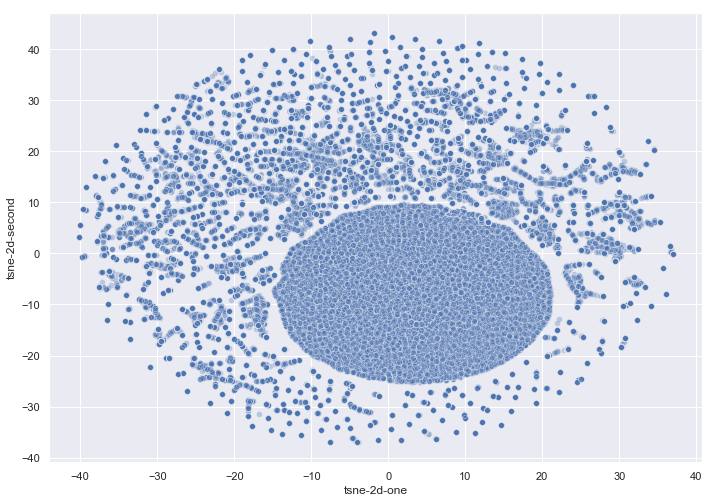

In [144]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-second'] = tsne_results[:,1]
#plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-second",
    #hue="tsne-2d-Users",
    palette=sns.color_palette("Paired", n_colors=2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [83]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format

In [102]:
DIR = r'C:\Users\Anusha\Documents\NYU\Big-Data'
DIR_GENRE = r'C:\Users\Anusha\Documents\NYU\Big-Data\genre'

In [103]:
def count_reviews(file_name):
    print('counting file:', file_name)
    n_review = 0
    book_set, user_set = set(), set()
    print('current line: ', end='')
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if n_review % 1000000 == 0:
                print(n_review, end=',')
            n_review += 1
            book_set.add(d['book_id'])
            user_set.add(d['user_id'])
    print('complete')
    print('done!')
    return n_review, len(book_set), len(user_set)

In [104]:
n_review, n_book, n_user = count_reviews(os.path.join(DIR, 'goodreads_reviews_dedup.json.gz'))
df_stats_review = pd.DataFrame([n_review, n_book, n_user], dtype=float,
                               columns=['count'], index=['# review', '# book', '# user'])
display(df_stats_review)

counting file: C:\Users\Anusha\Documents\NYU\Big-Data\goodreads_reviews_dedup.json.gz
current line: 0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000,14000000,15000000,complete
done!


,count
# review,"15,739,967.0"
# book,"2,080,190.0"
# user,"465,323.0"


In [105]:
genre_list = ['fantasy_paranormal', 'history_biography',
              'poetry', 'young_adult']

def count_all_genres(genre_list):
    res = []
    for g in genre_list:
        n_review, n_book, n_user = count_reviews(
            os.path.join(DIR_GENRE, 'goodreads_reviews_'+g+'.json.gz'))
        res.append([n_review, n_book, n_user])
    df_stats_by_genre = pd.DataFrame(res, dtype = float, 
                                     columns = ['# review', '# book', '# user'],
                                     index = genre_list)
    return df_stats_by_genre

In [106]:
df_stats_by_genre = count_all_genres(genre_list)
display(df_stats_by_genre)

counting file: C:\Users\Anusha\Documents\NYU\Big-Data\genre\goodreads_reviews_fantasy_paranormal.json.gz
current line: 0,1000000,2000000,3000000,complete
done!
counting file: C:\Users\Anusha\Documents\NYU\Big-Data\genre\goodreads_reviews_history_biography.json.gz
current line: 0,1000000,2000000,complete
done!
counting file: C:\Users\Anusha\Documents\NYU\Big-Data\genre\goodreads_reviews_poetry.json.gz
current line: 0,complete
done!
counting file: C:\Users\Anusha\Documents\NYU\Big-Data\genre\goodreads_reviews_young_adult.json.gz
current line: 0,1000000,2000000,complete
done!


,# review,# book,# user
fantasy_paranormal,"3,424,641.0","258,212.0","256,088.0"
history_biography,"2,066,193.0","302,346.0","238,450.0"
poetry,"154,555.0","36,412.0","47,400.0"
young_adult,"2,389,900.0","93,267.0","209,152.0"


In [116]:
df_stats_by_genre['genre'] = genre_list
df_stats_by_genre.head()

,# review,# book,# user,genre
fantasy_paranormal,"3,424,641.0","258,212.0","256,088.0",fantasy_paranormal
history_biography,"2,066,193.0","302,346.0","238,450.0",history_biography
poetry,"154,555.0","36,412.0","47,400.0",poetry
young_adult,"2,389,900.0","93,267.0","209,152.0",young_adult


### 2) Additional features: Number of reviews given by total number of users for each genre

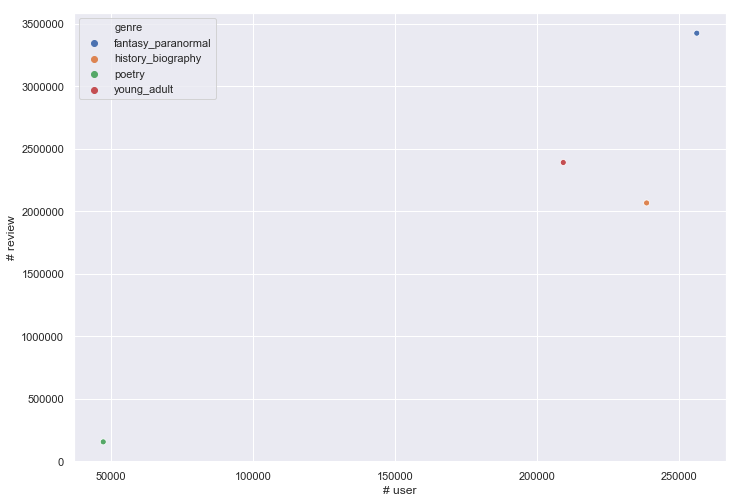

In [120]:
ax = sns.scatterplot(x="# user", y="# review", hue="genre",
                     data=df_stats_by_genre)